# DAY 8 Practice Assignments:
 
    1.	Develop a DCGAN model for CIFAR-10 small object Photograph Dataset, for implement this model - create a generator and discriminator model and then generate the new set of fake images to ensure the GAN outcome.
    2.	Explore the Latent Space when Generating images

# 1.Develop a DCGAN model for CIFAR-10 small object Photograph Dataset, for implement this model - create a generator and discriminator model and then generate the new set of fake images to ensure the GAN outcome.

1/1 [==============================] - 0s 294ms/step
1/5, batch=1/15, d_loss_real=0.9022365808486938, d_loss_fake=0.8221965432167053, g_loss=0.6924941539764404
1/1 [==============================] - 0s 138ms/step
1/5, batch=2/15, d_loss_real=0.45624005794525146, d_loss_fake=1.3544561862945557, g_loss=0.6917138695716858
1/1 [==============================] - 0s 140ms/step
1/5, batch=3/15, d_loss_real=0.40077102184295654, d_loss_fake=2.20515775680542, g_loss=0.6920065879821777
1/1 [==============================] - 0s 141ms/step
1/5, batch=4/15, d_loss_real=0.5276286602020264, d_loss_fake=1.7609951496124268, g_loss=0.6939610838890076
1/1 [==============================] - 0s 136ms/step
1/5, batch=5/15, d_loss_real=0.32536202669143677, d_loss_fake=0.5081008672714233, g_loss=0.6951887011528015
1/1 [==============================] - 0s 134ms/step
1/5, batch=6/15, d_loss_real=0.9217768311500549, d_loss_fake=0.43510833382606506, g_loss=0.6940929293632507
1/1 [==============================] -

1/1 [==============================] - 0s 141ms/step
4/5, batch=7/15, d_loss_real=0.16601379215717316, d_loss_fake=0.18688231706619263, g_loss=0.5401322841644287
1/1 [==============================] - 0s 139ms/step
4/5, batch=8/15, d_loss_real=0.22626662254333496, d_loss_fake=0.002020326443016529, g_loss=0.5715219974517822
1/1 [==============================] - 0s 137ms/step
4/5, batch=9/15, d_loss_real=0.06947343051433563, d_loss_fake=0.009613774716854095, g_loss=0.5353556871414185
1/1 [==============================] - 0s 144ms/step
4/5, batch=10/15, d_loss_real=0.1425965577363968, d_loss_fake=0.01742379367351532, g_loss=0.496340811252594
1/1 [==============================] - 0s 155ms/step
4/5, batch=11/15, d_loss_real=0.09130827337503433, d_loss_fake=0.024566076695919037, g_loss=0.5001006722450256
1/1 [==============================] - 0s 137ms/step
4/5, batch=12/15, d_loss_real=0.10357717424631119, d_loss_fake=0.08043105155229568, g_loss=0.5067082643508911
1/1 [===================

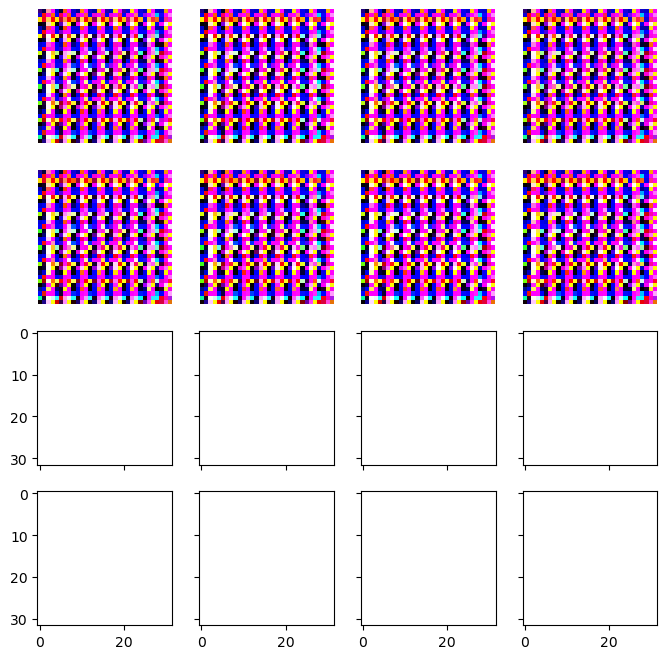

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, Conv2DTranspose, BatchNormalization, LeakyReLU, Flatten, Conv2D
from keras.optimizers import Adam
from numpy.random import randn, randint
import matplotlib.pyplot as plt

# Load a subset of CIFAR-10 dataset
(x_train, _), (_, _) = cifar10.load_data()
x_train = (x_train - 127.5) / 127.5  # Normalize pixel values to the range [-1, 1]

# Select a subset (e.g., 5000 samples) for faster training
subset_size = 250
x_train_subset = x_train[:subset_size]

# Generator Model
def build_generator(latent_dim):
    model = Sequential()
    model.add(Dense(128 * 8 * 8, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(3, (16, 16), activation='tanh', padding='same'))
    return model

# Discriminator Model
def build_discriminator(input_shape=(32, 32, 3)):
    model = Sequential()
    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# GAN Model
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return model

# Generate real samples with class labels
def generate_real_samples(dataset, n_samples):
    ix = randint(0, dataset.shape[0], n_samples)
    x = dataset[ix]
    y = np.ones((n_samples, 1))
    return x, y

# Generate fake samples with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    x = generator.predict(x_input)
    y = np.zeros((n_samples, 1))
    return x, y

# Generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

# Train GAN
def train_gan(generator, discriminator, gan, dataset, latent_dim, epochs=5, batch_size=16):
    batch_per_epoch = int(dataset.shape[0] / batch_size)
    half_batch = int(batch_size / 2)

    for epoch in range(epochs):
        for batch in range(batch_per_epoch):
            x_real, y_real = generate_real_samples(dataset, half_batch)
            d_loss_real = discriminator.train_on_batch(x_real, y_real)

            x_fake, y_fake = generate_fake_samples(generator, latent_dim, half_batch)
            d_loss_fake = discriminator.train_on_batch(x_fake, y_fake)

            x_gan = generate_latent_points(latent_dim, batch_size)
            y_gan = np.ones((batch_size, 1))
            g_loss = gan.train_on_batch(x_gan, y_gan)

            print(f"{epoch + 1}/{epochs}, batch={batch + 1}/{batch_per_epoch}, d_loss_real={d_loss_real[0]}, d_loss_fake={d_loss_fake[0]}, g_loss={g_loss}")

# Generate and save a plot of generated images
def generate_and_save_images(generator, latent_dim, n_samples=8):
    x_fake, _ = generate_fake_samples(generator, latent_dim, n_samples)
    
    # Denormalize pixel values
    x_fake = (x_fake + 1) / 2.0

    fig, axes = plt.subplots(4, 4, figsize=(8, 8), sharey=True, sharex=True)
    for i in range(n_samples):
        axes[i // 4, i % 4].imshow(x_fake[i])
        axes[i // 4, i % 4].axis('off')
    plt.show()
    
# Number of dimensions in the latent space
latent_dim = 25

# Build and compile the discriminator
discriminator_model = build_discriminator()
# Build the generator
generator_model = build_generator(latent_dim)
# Build and compile the GAN model
gan_model = build_gan(generator_model, discriminator_model)
# Train GAN
train_gan(generator_model, discriminator_model, gan_model, x_train_subset, latent_dim)

# Generate and save a plot of generated images
generate_and_save_images(generator_model, latent_dim)